In [2]:
from os import path
import numpy as np
from numpy import ndarray
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)


#reading data
data:DataFrame = pd.read_csv("d:/data/headbrain.csv")
print(data.__class__, data.shape)
data.head(5)

<class 'pandas.core.frame.DataFrame'> (237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
X:np.ndarray = data["Head Size(cm^3)"].values
print(X.__class__, X.shape)
Y:np.ndarray = data["Brain Weight(grams)"].values
print(Y.__class__, Y.shape)

<class 'numpy.ndarray'> (237,)
<class 'numpy.ndarray'> (237,)


In [4]:
#Mean x and y
mean_x: float = np.mean(X)
print(mean_x.__class__, mean_x)
mean_y: float = np.mean(Y)
print(mean_y.__class__, mean_y)
#Total number of values
m: int = len(X)

#Using the formula to calculate b1 and b2
numer:float = 0
denom:float = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

print(b1, b0)

<class 'numpy.float64'> 3633.99156118
<class 'numpy.float64'> 1282.87341772
0.263429339489 325.573421049


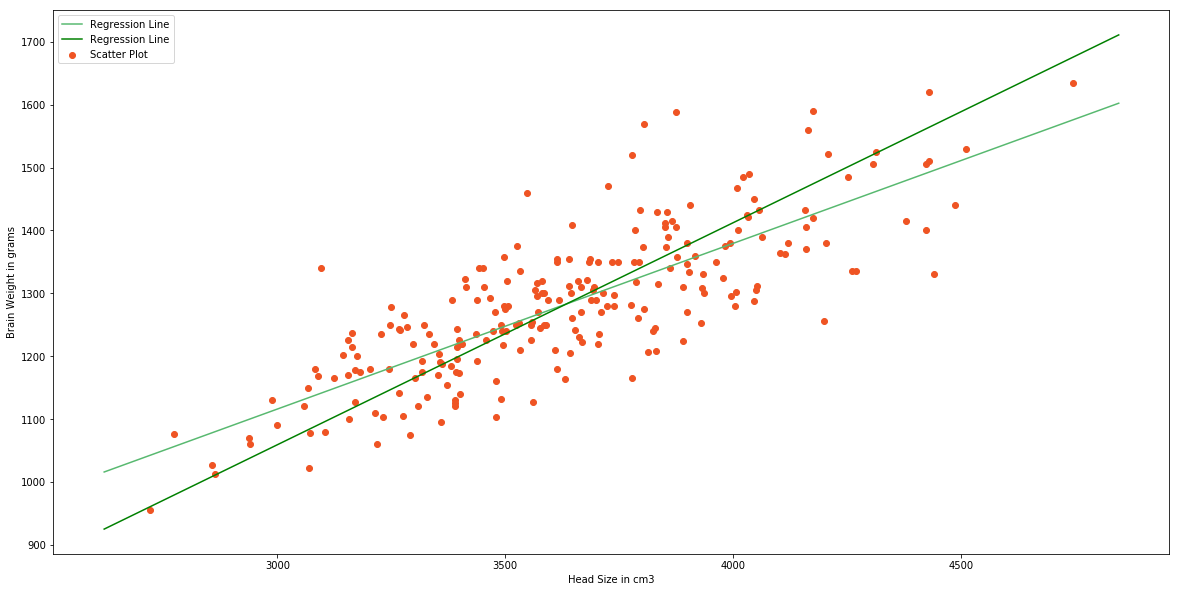

In [5]:
max_x: float = np.max(X) + 100
min_x: float = np.min(X) - 100
#calculating line values x and y
x: np.ndarray = np.linspace(min_x, max_x, 1000)
y: np.ndarray = b0 + b1 * x
# print(x.__class__, x)
# print(y.__class__, y)
#ploting line
plt.plot(x, y, color='#58b970', label='Regression Line')
plt.plot(x, (mean_y / mean_x) * x, color='green', label='Regression Line')
#ploting scatter points
plt.scatter(X, Y, color='#ef5423', label='Scatter Plot')

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()


In [7]:
rmse: float = 0
for i in range(m):
    y_pred: float = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse / m)
print(rmse)


72.1206213784


In [8]:
ss_t: float = 0
ss_r: float = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2

r2: float = 1 - (ss_r / ss_t)
print(r2)


0.639311719957


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Can not use Rank 1 matrix in scikit learn
X: ndarray = X.reshape((m, 1))
#Creating Model
reg: LinearRegression = LinearRegression()
#Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred: ndarray = reg.predict(X)

#Calculating RMSE and R2 Score
mse: float = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
print(rmse)
r2_score: float = reg.score(X, Y)
print(r2_score)


72.1206213784
0.639311719957
